# 4章 確率と統計の基礎

In [55]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

In [9]:
# サイコロ
dice_data = np.array([1,2,3,4,5,6])
print(dice_data)

[1 2 3 4 5 6]


In [12]:
# random choice
print('1つだけランダムに抽出：',np.random.choice(dice_data,1))

1つだけランダムに抽出： [5]


In [6]:
print('10つランダムに抽出：',np.random.choice(dice_data,10))
print(type(np.random.choice(dice_data,10)))

10つランダムに抽出： [5 3 2 1 2 6 2 6 1 2]
<class 'numpy.ndarray'>


In [13]:
# サイコロを1000回振ってみる
calc_steps = 1000
dice_rolls = np.random.choice(dice_data,calc_steps)
for i in range(1,7):
    p = len(dice_rolls[dice_rolls==i])/calc_steps
    print(i,'が出る確率',p)

1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


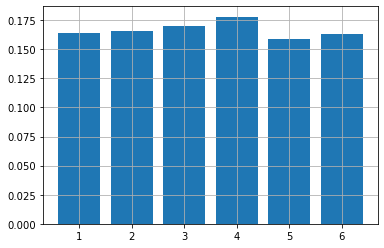

In [14]:
# 一様分布
calc_steps = 1000
dice_rolls = np.random.choice(dice_data,calc_steps)
prob_data = np.array([])
for i in range(1,7):
    p = len(dice_rolls[dice_rolls==i])/calc_steps
    prob_data = np.append(prob_data,p)
plt.bar(dice_data,prob_data)
plt.grid(True)

In [18]:
# ベルヌーイ分布
# コインの表裏
prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])
# np.unique で一意な値を抽出（ここでは0と1）
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i])/len(coin_data)
    print(i,'が出る確率',p)
    prob_be_data = np.append(prob_be_data,p)

0 が出る確率 0.625
1 が出る確率 0.375


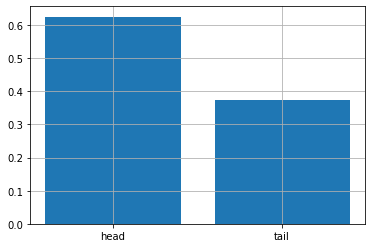

In [21]:
plt.bar([0,1],prob_be_data,align='center')
plt.xticks([0,1],['head','tail'])
plt.grid(True)

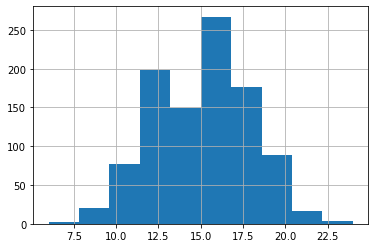

In [34]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(30,0.5,1000)
# 確率0.5の試行を30回実施した時の発生回数を1000個返す。
plt.hist(x)
plt.grid(True)

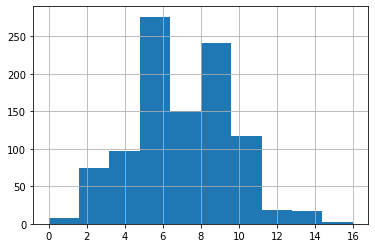

In [35]:
#　ポアソン分布
x = np.random.poisson(7,1000)
# 7がlambda、1000がサンプル数
plt.hist(x)
plt.grid(True)

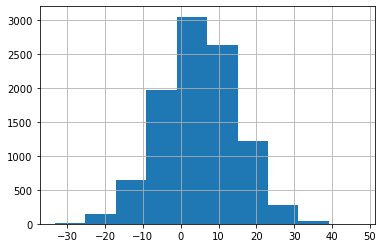

In [36]:
# 正規分布
# np.random.normal(平均,標準偏差,サンプル数)
x = np.random.normal(5,10,10000)
plt.hist(x)
plt.grid(True)

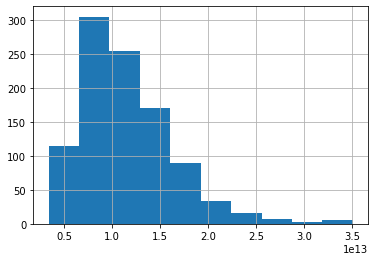

In [37]:
# 対数正規分布
x = np.random.lognormal(30,0.4,1000)
plt.hist(x)
plt.grid(True)

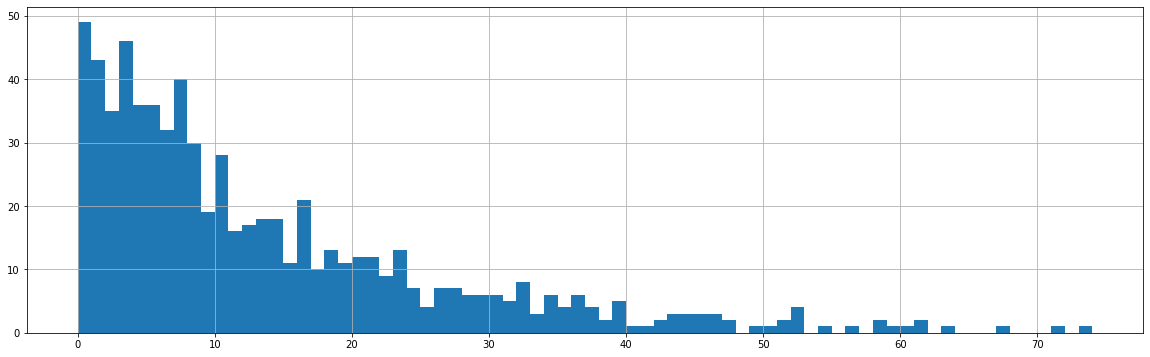

In [40]:
# 練習（93%ループで継続する場合の大当たり回数分布）

marubatu = ["o","x"]
rate = [0.93,0.07]
oatari = []
num = 0
for i in range(10000):
    if np.random.choice(a=marubatu,size=1,p=rate) == 'o':
        num += 1
    else:
        oatari.append(num)
        num = 0
x = oatari
plt.figure(figsize=(20,6))
#plt.hist(x, bins = np.unique(oatari).size)
plt.hist(x, bins = np.max(oatari))
plt.grid(True)

In [62]:
marubatu = ["o","x"]
rate = [0.93,0.07]
oatari = []
num = 0
for i in range(10000):
    if np.random.choice(a=marubatu,size=1,p=rate) == 'o':
        num += 1
    else:
        oatari.append(num)
        num = 0
x = np.array(oatari)
rentyansuu = np.array([])
for i in range(np.max(oatari)+1):
    rentyansuu = np.append(rentyansuu,np.count_nonzero(x == i))
print("n=",len(oatari))
a = 0
for i in range(np.max(oatari)+1):
    a += rentyansuu[i]
    print("連チャン数が",i,"回以下の確率：","{:.3f}".format(a/len(oatari)))

n= 665
連チャン数が 0 回以下の確率： 0.080
連チャン数が 1 回以下の確率： 0.134
連チャン数が 2 回以下の確率： 0.194
連チャン数が 3 回以下の確率： 0.233
連チャン数が 4 回以下の確率： 0.289
連チャン数が 5 回以下の確率： 0.334
連チャン数が 6 回以下の確率： 0.371
連チャン数が 7 回以下の確率： 0.406
連チャン数が 8 回以下の確率： 0.459
連チャン数が 9 回以下の確率： 0.486
連チャン数が 10 回以下の確率： 0.528
連チャン数が 11 回以下の確率： 0.567
連チャン数が 12 回以下の確率： 0.600
連チャン数が 13 回以下の確率： 0.638
連チャン数が 14 回以下の確率： 0.669
連チャン数が 15 回以下の確率： 0.687
連チャン数が 16 回以下の確率： 0.704
連チャン数が 17 回以下の確率： 0.722
連チャン数が 18 回以下の確率： 0.740
連チャン数が 19 回以下の確率： 0.752
連チャン数が 20 回以下の確率： 0.762
連チャン数が 21 回以下の確率： 0.773
連チャン数が 22 回以下の確率： 0.794
連チャン数が 23 回以下の確率： 0.803
連チャン数が 24 回以下の確率： 0.814
連チャン数が 25 回以下の確率： 0.823
連チャン数が 26 回以下の確率： 0.832
連チャン数が 27 回以下の確率： 0.848
連チャン数が 28 回以下の確率： 0.862
連チャン数が 29 回以下の確率： 0.874
連チャン数が 30 回以下の確率： 0.881
連チャン数が 31 回以下の確率： 0.884
連チャン数が 32 回以下の確率： 0.893
連チャン数が 33 回以下の確率： 0.899
連チャン数が 34 回以下の確率： 0.907
連チャン数が 35 回以下の確率： 0.913
連チャン数が 36 回以下の確率： 0.919
連チャン数が 37 回以下の確率： 0.923
連チャン数が 38 回以下の確率： 0.931
連チャン数が 39 回以下の確率： 0.934
連チャン数が 40 回以下の確率： 0.938
連チャン数が 41 回以下の確率： 0

## カーネル密度関数

student_data_math.absences.plot(kind='kde',style='k--')

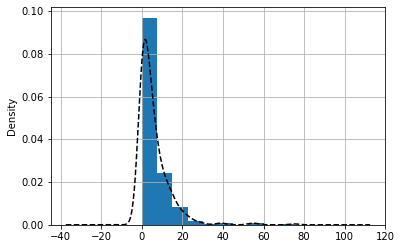

In [70]:
import requests
import zipfile
from io import StringIO
import io
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
#r=requests.get(url,stream=True)
#z = zipfile.ZipFile(io.BytesIO(r.content))
#z.extractall()
path = './chap3/student-mat.csv'
student_data_math = pd.read_csv(path,sep=';')
student_data_math.absences.plot(kind='kde', style='k--')
student_data_math.absences.hist(density = True)
plt.grid(True)

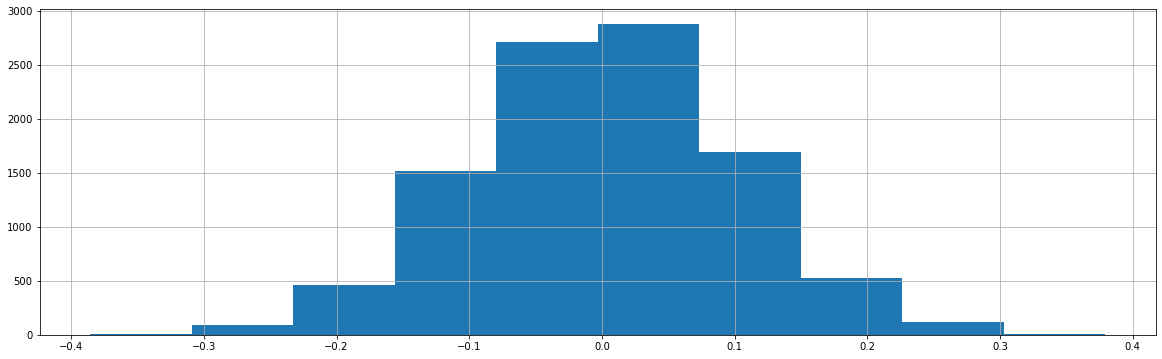

In [71]:
# 練習問題4-4
X = np.array([])
for i in range(10000):
    x = np.random.normal(0,1,100)
    X = np.append(X,np.mean(x))
plt.figure(figsize = (20,6))
plt.hist(X)
plt.grid(True)

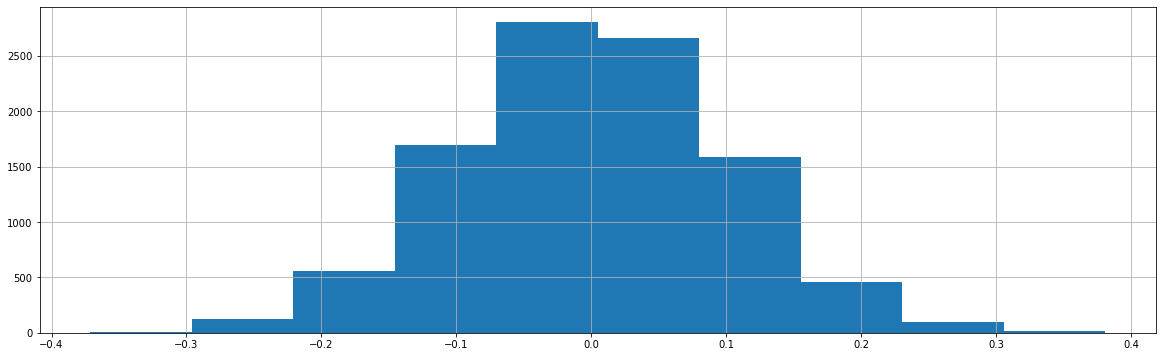

In [72]:
# 練習問題4-4 (解答)
N = 10000
X = [np.mean(np.random.normal(0,1,100)) for _ in range(N)]
plt.figure(figsize = (20,6))
plt.hist(X)
plt.grid(True)

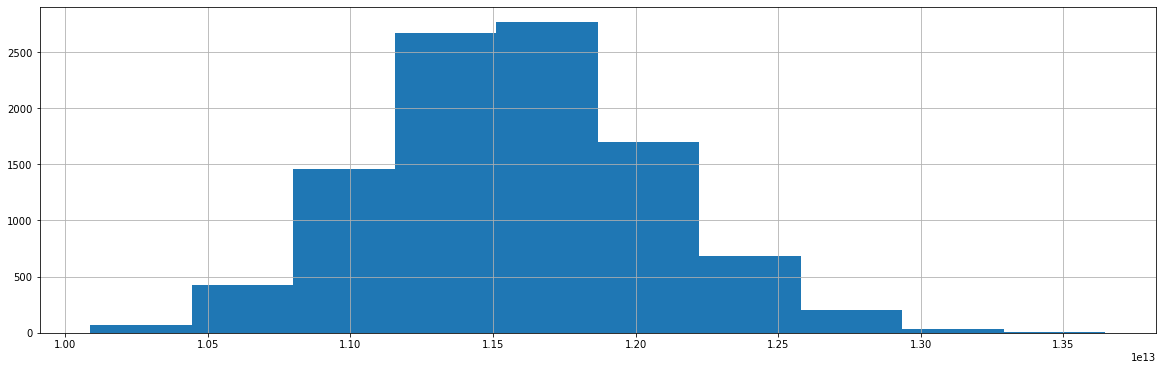

In [73]:
# 練習問題4-5
N = 10000
X = [np.mean(np.random.lognormal(30,0.4,100)) for _ in range(N)]
#log(30)=1.477...
plt.figure(figsize = (20,6))
plt.hist(X)
plt.grid(True)

In [74]:
# 練習問題4-6
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


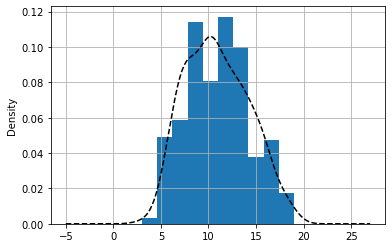

In [76]:
student_data_math = pd.read_csv(path,sep=';')
student_data_math.G1.plot(kind='kde',style='k--')
plt.hist(student_data_math.G1,density=True)
plt.grid(True)

In [77]:
# 多次元確率分布

import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

x,y = np.mgrid[10:100:2,10:100:2]
pos = np.empty(x.shape + (2,))

pos[:,:,0] = x
pos[:,:,1] = y

In [78]:
rv = multivariate_normal([50,50],[[100,0],[0,100]])
z = rv.pdf(pos)

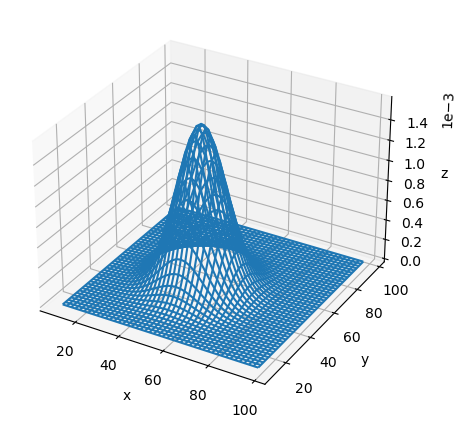

In [80]:
fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax.plot_wireframe(x,y,z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.ticklabel_format(style='sci',axis='z',scilimits=(0,0))

## 推計統計学

### 対数の法則

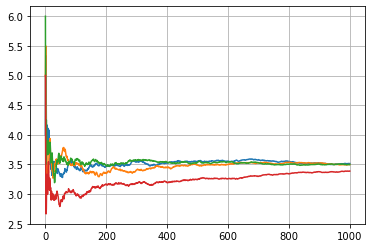

In [81]:
calc_times = 1000
#サイコロ
samplr_array = np.array([1,2,3,4,5,6])
number_cnt = np.arange(1,calc_times+1)
#４つのパスを作成
for i in range(4):
    p = np.random.choice(samplr_array, calc_times).cumsum()
    plt.plot(p/number_cnt)
    plt.grid(True)

### 中心極限定理

In [102]:
# 正規分布
def function_central_theory(N):
    sample_array = np.array([1,2,3,4,5,6])
    #number_cnt = np.arange(1,N+1)*1.0
    mean_array = np.array([])
    
    for i in range(1000):
        cum_variables = np.random.choice(sample_array,N).cumsum()
        mean_array = np.append(mean_array,cum_variables[N-1]/N)
        
    plt.hist(mean_array)
    plt.grid(True)

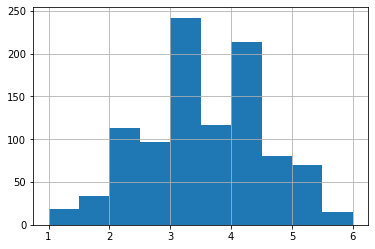

In [103]:
function_central_theory(3)

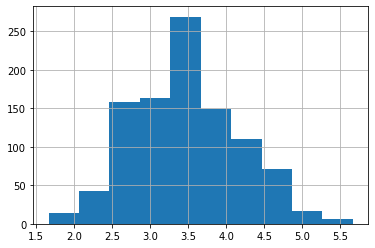

In [104]:
function_central_theory(6)

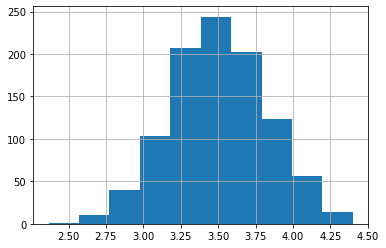

In [107]:
function_central_theory(10*3)

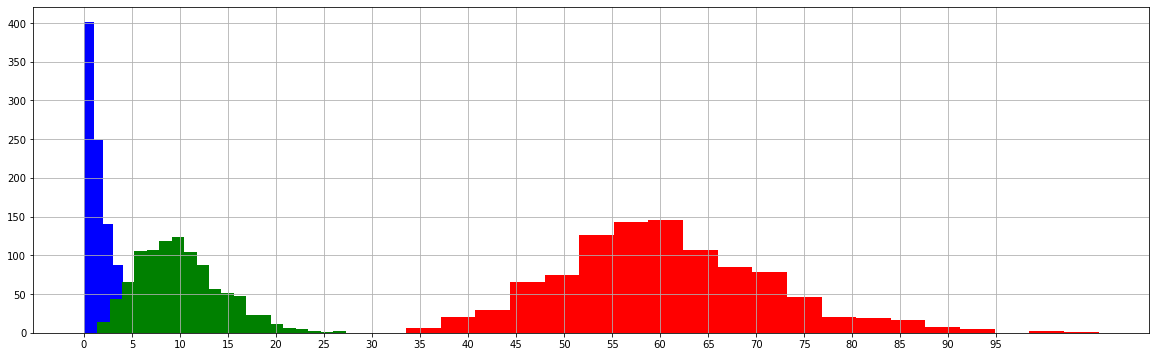

In [115]:
# カイ二乗分布
# 自由度2,10,60に従うカイ二乗分布が生成する乱数のヒストグラム
plt.figure(figsize=(20,6))
for df,c in zip([2,10,60],'bgr'):
    x = np.random.chisquare(df,1000)
    plt.hist(x,20,color=c)
    plt.xticks(np.arange(0,100,5))
    plt.grid(True)

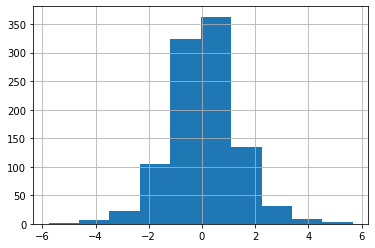

In [118]:
# スチューデントのt分布
x = np.random.standard_t(5,1000)
plt.hist(x)
plt.grid(True)

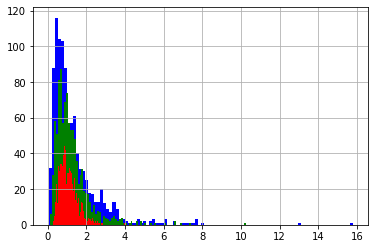

In [125]:
# F分布
for df,c in zip([(6,7),(10,10),(20,25)],'bgr'):
    x = np.random.f(df[0],df[1],1000)
    plt.hist(x,100,color=c)
    plt.grid(True)

### 統計的推定

In [126]:
#練習問題4-10　→　手計算

### 統計的検定

In [127]:
student_data_math = pd.read_csv('./chap3/student-mat.csv',sep=';')
student_data_por = pd.read_csv('./chap3/student-por.csv',sep=';')
student_data_merge = pd.merge(student_data_math,student_data_por
                             , on = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet']
                             , suffixes=('_math','_por'))
print('G1数学の成績：',student_data_merge.G1_math.mean())
print('G1ポルトガル語の成績：',student_data_merge.G1_por.mean())

G1数学の成績： 10.861256544502618
G1ポルトガル語の成績： 12.112565445026178


In [128]:
# 帰無仮説 : 数学の平均点=ポルトガル語の平均点
from scipy import stats
t,p = stats.ttest_rel(student_data_merge.G1_math,student_data_merge.G1_por)
print('p値＝',p)

p値＝ 1.653655521710079e-16


In [129]:
#練習問題4-13
print('G2数学の成績：',student_data_merge.G2_math.mean())
print('G2ポルトガル語の成績：',student_data_merge.G2_por.mean())

G2数学の成績： 10.712041884816754
G2ポルトガル語の成績： 12.238219895287958


In [130]:
t,p = stats.ttest_rel(student_data_merge.G2_math,student_data_merge.G2_por)
print('p値＝',p)

p値＝ 4.0622824801348043e-19


In [131]:
#4章総合問題
print('数学の勉強時間：',student_data_merge.studytime_math.mean())
print('ポルトガル語の勉強時間：',student_data_merge.studytime_por.mean())

数学の勉強時間： 2.0340314136125652
ポルトガル語の勉強時間： 2.0392670157068062


In [132]:
t,p = stats.ttest_rel(student_data_merge.studytime_math,student_data_merge.studytime_por)
print('p値＝',p)

p値＝ 0.5643842756976525
